1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


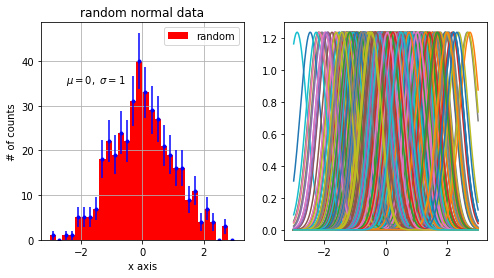

In [43]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
from matplotlib import pyplot as plt

np.random.seed(57917)
x = np.random.normal(0,1,400)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

entries, edges, _  = ax1.hist(x,30,(-3,3),color="red",label="random")
bin_centers = 0.5 * (edges[:-1] + edges[1:])

ax1.legend()
ax1.grid()
ax1.set_ylabel("# of counts")
ax1.set_xlabel("x axis")
ax1.set_title("random normal data")
ax1.text(-2.5, 35, r'$\mu=0,\ \sigma=1$')
ax1.errorbar(bin_centers, entries, yerr=np.sqrt(entries), fmt='b.')
#plt.errorbar(bin_centers, entries, yerr=np.sqrt(entries), fmt='b.') #add lines

size = len(x)

dev = 1.06*x.std()*len(x)**(-0.2)

G = np.zeros(400)
points = np.linspace(-3, 3, 400)

for i in range(0,size,1):
    ax2.plot(points, stats.norm.pdf(points, x[i], dev))
    G = G + stats.norm.pdf(points, x[i], dev)

#print(G)

h = scipy.integrate.trapz(G,points) 


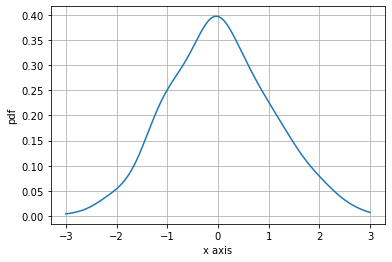

In [12]:
#plt.legend()
plt.grid()
plt.ylabel("pdf")
plt.xlabel("x axis")
plt.plot(points, G/h)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

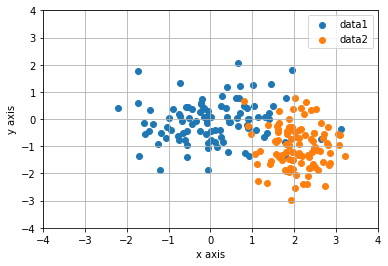

In [37]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
#from IPython.display import Image
#Image('two_categories_scatter_plot.png')

def func(n1,mean1,dev1,n2,mean2,dev2):
    x1 = np.random.normal(mean1[0],dev1[0],n1)
    y1 = np.random.normal(mean1[1],dev1[1],n1)
    x2 = np.random.normal(mean2[0],dev2[0],n2)
    y2 = np.random.normal(mean2[1],dev2[1],n2)
    
    plt.scatter(x1, y1,label="data1")
    plt.scatter(x2, y2,label="data2")
    plt.legend()
    plt.grid()
    plt.ylabel("y axis")
    plt.xlabel("x axis")
    plt.xlim(-4,4)
    plt.ylim(-4,4)

    
func(100,(0,0),(1,0.75),100,(2,-1),(0.5,0.75))

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

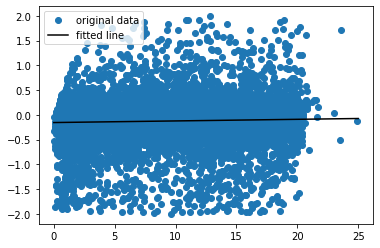

<ErrorbarContainer object of 3 artists>

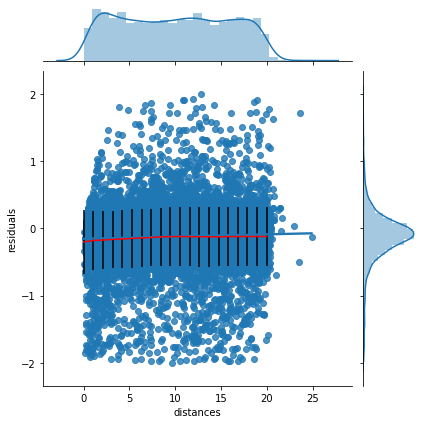

In [65]:
import seaborn as sns

data = np.load("residuals_261.npy", allow_pickle=True)

dataf = pd.DataFrame(data.item())

dataf = dataf[(dataf["residuals"])**2 < 4]

#dataf

x = dataf["distances"].tolist()
y = dataf["residuals"].tolist()

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, y, 'o', label='original data')

size = 25
pointsx = np.linspace(0, 25, size)
pointsy = []

for i in range(0,size,1): pointsy.append(intercept + slope*pointsx[i])

plt.plot(pointsx, pointsy, color='black', label='fitted line')
plt.legend()
plt.show()


sns.jointplot(x="distances", y="residuals", data=dataf, kind="reg")
#unfortunately fit and data has the same color 

bins = 20
h = 25/20
size = len(x)

xc = np.linspace(0, 20, bins)

yc = []
p = []

for n in range (0,bins,1):
    for i in range (0,size,1):
        t = x[i]
        if(t>n*h and t<(n+1)*h): p.append(y[i])
    pp = np.array(p)
    mean = pp.mean()
    yc.append(mean)
    
    
erry = []
p = []

for n in range (0,bins,1):
    for i in range (0,size,1):
        t = x[i]
        if(t>n*h and t<(n+1)*h): p.append(y[i])
    pp = np.array(p)
    dev = pp.std()
    erry.append(dev)
    
plt.errorbar(xc,yc,erry, color="red",ecolor="black")